In [ ]:

#Search TODO's
# Logistic Regression
import pandas as pd
import numpy as np


df = pd.read_csv('Subscription_Service_Churn_Dataset.csv')
# df.dtypes

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Churn']), 
                                                    df['Churn'], 
                                                    test_size=0.2, 
                                                    random_state=42)

# TODO: is this necessary?
X_train = X_train.drop('CustomerID', axis=1)


In [ ]:





from sklearn.linear_model import LogisticRegression





logit = LogisticRegression(
    max_iter=500,
    class_weight="balanced",   # remove if classes are already balanced
    solver="liblinear"         # supports L1/L2; good small/medium data
)


=== Target balance (TRAIN) ===
Churn
0    82.45%
1    17.55%
Name: proportion, dtype: object

Categorical columns: ['SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference', 'Gender', 'ParentalControl', 'SubtitlesEnabled', 'CustomerID']

=== Class balance for: SubscriptionType (TRAIN) ===
                  Count  Percent
SubscriptionType                
Premium             333    34.58
Basic               293    30.43
Standard            287    29.80
NaN                  50     5.19

=== Class balance for: PaymentMethod (TRAIN) ===
                  Count  Percent
PaymentMethod                   
Credit card         245    25.44
NaN                 223    23.16
Electronic check    214    22.22
Bank transfer       214    22.22
Mailed check         67     6.96

=== Class balance for: PaperlessBilling (TRAIN) ===
                  Count  Percent
PaperlessBilling                
No                  506    52.54
Yes 

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

num_cols = X_train.select_dtypes(include=['number']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object','category']).columns.tolist()

numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(
        drop="first",                 # avoid perfect multicollinearity
        handle_unknown="ignore",
        min_frequency=10              # collapse rare levels; adjust as needed
    ))
])

preprocess = ColumnTransformer([
    ("num", numeric_pipe, num_cols),
    ("cat", categorical_pipe, cat_cols)
])


In [13]:
clf = Pipeline([
    ("prep", preprocess),
    ("model", logit)
])

clf.fit(X_train, y_train)


,steps,"[('prep', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


     AccountAge  MonthlyCharges  TotalCharges SubscriptionType  \
529          44       18.313620           NaN            Basic   
342         112       15.746052           NaN            Basic   
352          75       13.909022   1043.176662         Standard   
819          89        7.897943    702.916893          Premium   
277          39       16.892813    658.819696              NaN   

        PaymentMethod PaperlessBilling ContentType MultiDeviceAccess  \
529  Electronic check               No        Both                No   
342       Credit card              Yes        Both               Yes   
352       Credit card              Yes        Both                No   
819       Credit card               No      Movies                No   
277     Bank transfer              Yes        Both                No   

    DeviceRegistered  ViewingHoursPerWeek  AverageViewingDuration  \
529               TV             2.825674               38.965528   
342              NaN            

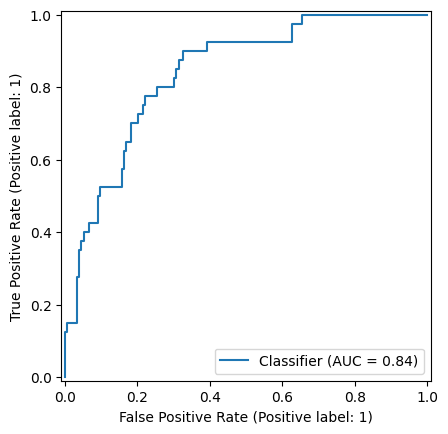

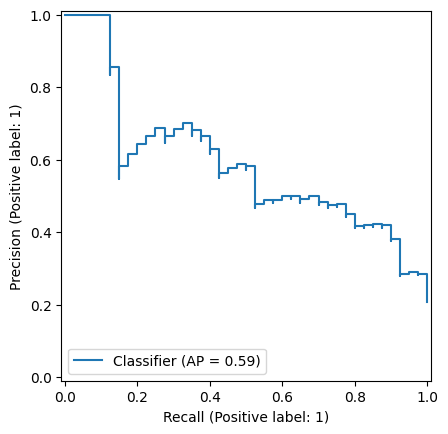

In [15]:
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    RocCurveDisplay, PrecisionRecallDisplay
)
import matplotlib.pyplot as plt




# X_test is simply all columns in the test file


print(X_test.head())
print("Shape:", X_test.shape)

# Probabilities + labels
y_proba = clf.predict_proba(X_test)[:, 1]
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=3))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

RocCurveDisplay.from_predictions(y_test, y_proba)
plt.show()

PrecisionRecallDisplay.from_predictions(y_test, y_proba)
plt.show()
